In [1]:
# Import basic packages for later use
import os
import shutil
from collections import OrderedDict

import json
import matplotlib.pyplot as plt

import numpy as np
import torch

In [2]:
# check whether GPU accelerated computing is available
assert torch.cuda.is_available() # if there is an error here, enable GPU in the Runtime

In [3]:
!pip install SimpleITK==2.3.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 35.1 MB/s eta 0:00:00


In [4]:
!pip install nibabel==5.2.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 84.7 MB/s eta 0:00:00
  Attempting uninstall: nibabel
    Found existing installation: nibabel 5.0.1
    Uninstalling nibabel-5.0.1:
      Successfully uninstalled nibabel-5.0.1


In [5]:
# install nnunet - yes it is that easy
!pip install nnunetv2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.0/197.0 kB 15.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_

In [ ]:
# check if nnunet can be imported
import nnunetv2


In [18]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import os module
import os

# Define paths for the required directories
data_path = '/content/drive/My Drive/nnUNet_data'
raw_data_path = os.path.join(data_path, 'nnUNet_raw')
preprocessed_path = os.path.join(data_path, 'nnUNet_preprocessed')
results_path = os.path.join(data_path, 'nnUNet_results')

# Set environment variables
os.environ['nnUNet_raw'] = raw_data_path
os.environ['nnUNet_preprocessed'] = preprocessed_path
os.environ['nnUNet_results'] = results_path

# Verify environment variables are set correctly
print(os.environ['nnUNet_raw'])
print(os.environ['nnUNet_preprocessed'])
print(os.environ['nnUNet_results'])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/nnUNet_data/nnUNet_raw
/content/drive/My Drive/nnUNet_data/nnUNet_preprocessed
/content/drive/My Drive/nnUNet_data/nnUNet_results


In [ ]:
!nnUNetv2_plan_and_preprocess -d 112 -c 3d_fullres --verify_dataset_integrity

Fingerprint extraction...
Dataset112_ToothFairy2
Using <class 'nnunetv2.imageio.simpleitk_reader_writer.SimpleITKIO'> as reader/writer

####################
verify_dataset_integrity Done. 
If you didn't see any error messages then your dataset is most likely OK!
####################

Using <class 'nnunetv2.imageio.simpleitk_reader_writer.SimpleITKIO'> as reader/writer
100% 54/54 [06:37<00:00,  7.36s/it]
Experiment planning...

############################
INFO: You are using the old nnU-Net default planner. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

Attempting to find 3d_lowres config. 
Current spacing: [0.309 0.309 0.309]. 
Current patch size: (96, 160, 128). 
Current median shape: [266.01941748 398.05825243 398.05825243]
Attempting to find 3d_lowres config. 
Current spacing: [0.31827 0.31827 0.31827]. 
Current patch size: (96, 160

In [ ]:
!nnUNetv2_train 112 3d_fullres 3 -tr nnUNetTrainer_5epochs | tee train_log.txt


############################
INFO: You are using the old nnU-Net default plans. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

2024-07-29 17:36:09.777927: do_dummy_2d_data_aug: False
2024-07-29 17:36:09.800914: Using splits from existing split file: /content/drive/My Drive/nnUNet_data/nnUNet_preprocessed/Dataset112_ToothFairy2/splits_final.json
2024-07-29 17:36:09.805568: The split file contains 5 splits.
2024-07-29 17:

In [2]:
# prompt: validate the model

!nnUNetv2_predict -d 112 -i '/content/drive/My Drive/nnUNet_data/nnUNet_raw/Dataset112_ToothFairy2/imagesTs' -o '/content/drive/My Drive/nnunet_logs' -tr nnUNetTrainer_5epochs -c 3d_fullres -f 3



#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 3 cases in the source folder
I am process 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 3 cases that I would like to predict

Predicting ToothFairy2F_012:
perform_everything_on_device: True
100% 150/150 [00:31<00:00,  4.71it/s]
sending off prediction to background worker for resampling and export
done with ToothFairy2F_012

Predicting ToothFairy2F_056:
perform_everything_on_device: True
100% 150/150 [00:30<00:00,  4.84it/s]
sending off prediction to background worker for resampling and export
done with ToothFairy2F_056

Predicting ToothFairy2P_065:
perform_

In [ ]:
!nnUNetv2_export_model_to_zip -d 112 -o "/content/drive/My Drive/nnunet_logs/exported_model.zip" -c 3d_fullres -tr nnUNetTrainer_5epochs -f 3 -chk model_best


Configuration 3d_fullres
Exporting fold_3
Traceback (most recent call last):
  File "/usr/local/bin/nnUNetv2_export_model_to_zip", line 8, in <module>
    sys.exit(export_pretrained_model_entry())
  File "/usr/local/lib/python3.10/dist-packages/nnunetv2/model_sharing/entry_points.py", line 59, in export_pretrained_model_entry
    export_pretrained_model(dataset_name_or_id=args.d, output_file=args.o, configurations=args.c, trainer=args.tr,
  File "/usr/local/lib/python3.10/dist-packages/nnunetv2/model_sharing/model_export.py", line 42, in export_pretrained_model
    zipf.write(source_file, os.path.relpath(source_file, nnUNet_results))
  File "/usr/lib/python3.10/zipfile.py", line 1753, in write
    zinfo = ZipInfo.from_file(filename, arcname,
  File "/usr/lib/python3.10/zipfile.py", line 506, in from_file
    st = os.stat(filename)
FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/nnUNet_data/nnUNet_results/Dataset112_ToothFairy2/nnUNetTrainer_5epochs__nnU

In [13]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

# Paths to the prediction and original image files
prediction_path = '/content/drive/My Drive/nnunet_logs/ToothFairy2F_012.mha'
original_image_path = '/content/drive/My Drive/nnUNet_data/nnUNet_raw/Dataset112_ToothFairy2/imagesTs/ToothFairy2F_012_0000.mha'  # Adjust path as necessary

def load_mha(path):
    """ Load .mha file and convert to a numpy array. """
    image = sitk.ReadImage(path)
    array = sitk.GetArrayFromImage(image)
    return array




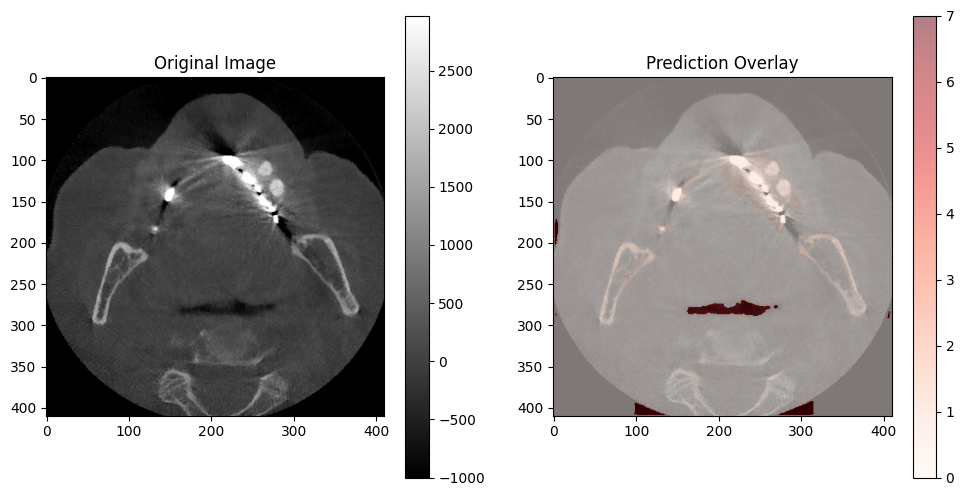

In [14]:
# Load the predicted segmentation and the original image
prediction_array = load_mha(prediction_path)
original_array = load_mha(original_image_path)

# Select a slice to visualize if it's a 3D volume
slice_index = prediction_array.shape[0] // 2  # Example: mid slice of a 3D volume

# Display the original and the prediction
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_array[slice_index], cmap='gray')
plt.title('Original Image')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(original_array[slice_index], cmap='gray')
plt.imshow(prediction_array[slice_index], alpha=0.5, cmap='Reds')  # Red overlay for the segmentation
plt.title('Prediction Overlay')
plt.colorbar()
plt.show()

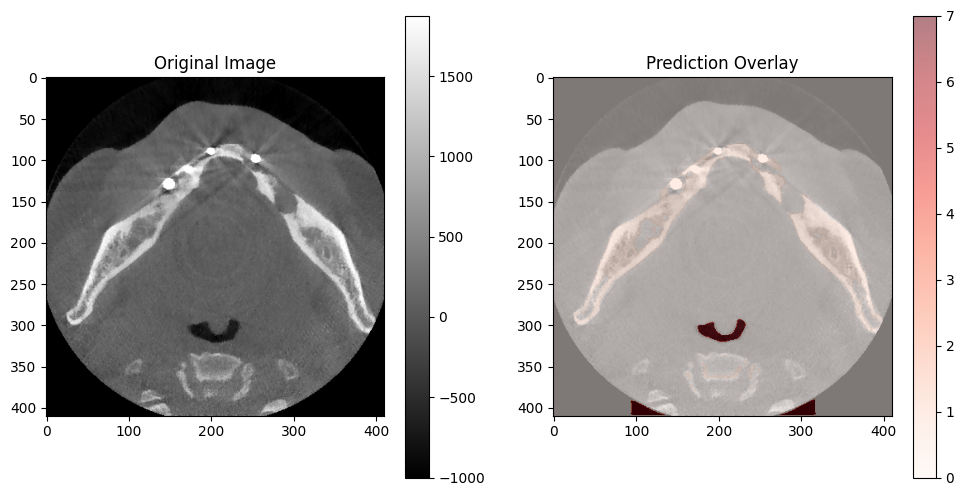

In [16]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

# Paths to the prediction and original image files
prediction_path = '/content/drive/My Drive/nnunet_logs/ToothFairy2F_056.mha'
original_image_path = '/content/drive/My Drive/nnUNet_data/nnUNet_raw/Dataset112_ToothFairy2/imagesTs/ToothFairy2F_056_0000.mha'  # Adjust path as necessary

def load_mha(path):
    """ Load .mha file and convert to a numpy array. """
    image = sitk.ReadImage(path)
    array = sitk.GetArrayFromImage(image)
    return array

# Load the predicted segmentation and the original image
prediction_array = load_mha(prediction_path)
original_array = load_mha(original_image_path)

# Select a slice to visualize if it's a 3D volume
slice_index = prediction_array.shape[0] // 2  # Example: mid slice of a 3D volume

# Display the original and the prediction
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_array[slice_index], cmap='gray')
plt.title('Original Image')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(original_array[slice_index], cmap='gray')
plt.imshow(prediction_array[slice_index], alpha=0.5, cmap='Reds')  # Red overlay for the segmentation
plt.title('Prediction Overlay')
plt.colorbar()
plt.show()


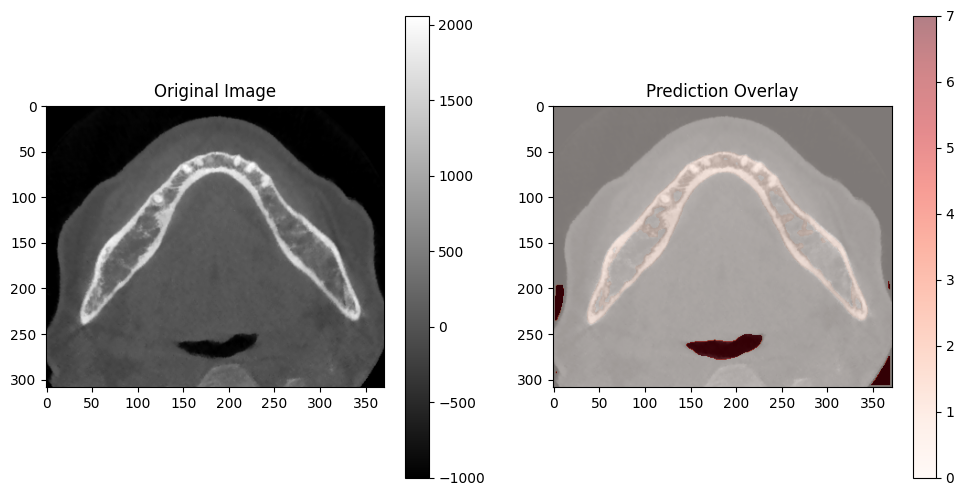

In [17]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

# Paths to the prediction and original image files
prediction_path = '/content/drive/My Drive/nnunet_logs/ToothFairy2P_065.mha'
original_image_path = '/content/drive/My Drive/nnUNet_data/nnUNet_raw/Dataset112_ToothFairy2/imagesTs/ToothFairy2P_065_0000.mha'  # Adjust path as necessary

def load_mha(path):
    """ Load .mha file and convert to a numpy array. """
    image = sitk.ReadImage(path)
    array = sitk.GetArrayFromImage(image)
    return array

# Load the predicted segmentation and the original image
prediction_array = load_mha(prediction_path)
original_array = load_mha(original_image_path)

# Select a slice to visualize if it's a 3D volume
slice_index = prediction_array.shape[0] // 2  # Example: mid slice of a 3D volume

# Display the original and the prediction
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_array[slice_index], cmap='gray')
plt.title('Original Image')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(original_array[slice_index], cmap='gray')
plt.imshow(prediction_array[slice_index], alpha=0.5, cmap='Reds')  # Red overlay for the segmentation
plt.title('Prediction Overlay')
plt.colorbar()
plt.show()


In [19]:
# prompt: validate the model

!nnUNetv2_predict -d 112 -i '/content/drive/My Drive/nnUNet_data/nnUNet_raw/Dataset112_ToothFairy2/imagesTs/' -o '/content/drive/My Drive/nnunet_logs' -tr nnUNetTrainer_5epochs -c 3d_fullres -f 3



#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 4 cases in the source folder
I am process 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 4 cases that I would like to predict

Predicting ToothFairy2F_012:
perform_everything_on_device: True
100% 150/150 [00:31<00:00,  4.71it/s]
sending off prediction to background worker for resampling and export
done with ToothFairy2F_012

Predicting ToothFairy2F_027:
perform_everything_on_device: True
100% 150/150 [00:30<00:00,  4.84it/s]
sending off prediction to background worker for resampling and export
done with ToothFairy2F_027

Predicting ToothFairy2F_056:
perform_

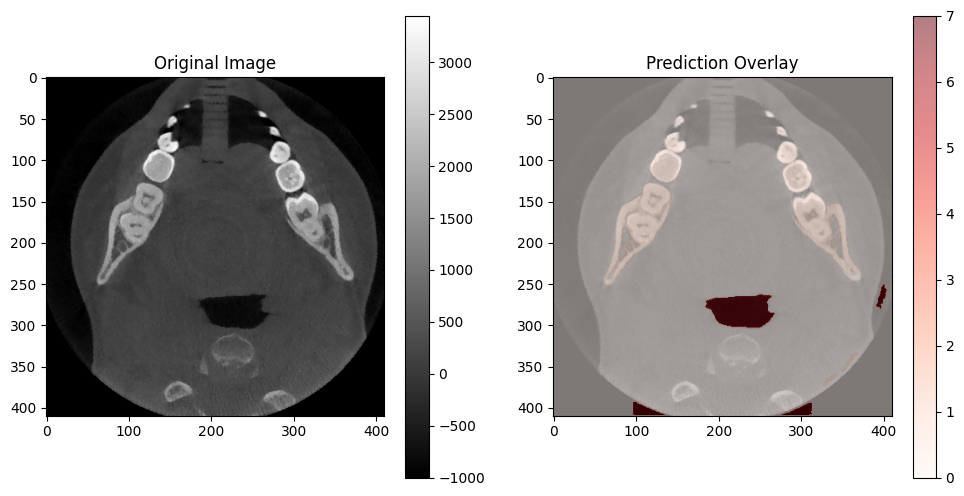

In [23]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

# Paths to the prediction and original image files
prediction_path = '/content/drive/My Drive/nnunet_logs/ToothFairy2F_027.mha'
original_image_path = '/content/drive/My Drive/nnUNet_data/nnUNet_raw/Dataset112_ToothFairy2/imagesTs/ToothFairy2F_027_0000.mha'  # Adjust path as necessary

def load_mha(path):
    """ Load .mha file and convert to a numpy array. """
    image = sitk.ReadImage(path)
    array = sitk.GetArrayFromImage(image)
    return array

# Load the predicted segmentation and the original image
prediction_array = load_mha(prediction_path)
original_array = load_mha(original_image_path)

# Select a slice to visualize if it's a 3D volume
slice_index = prediction_array.shape[0] // 2  # Example: mid slice of a 3D volume

# Display the original and the prediction
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_array[slice_index], cmap='gray')
plt.title('Original Image')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(original_array[slice_index], cmap='gray')
plt.imshow(prediction_array[slice_index], alpha=0.5, cmap='Reds')  # Red overlay for the segmentation
plt.title('Prediction Overlay')
plt.colorbar()
plt.show()


In [25]:
##Visualisation of ststistics and Metrics##
import SimpleITK as sitk
import numpy as np
from sklearn.metrics import jaccard_score, classification_report, confusion_matrix
from scipy import stats


In [26]:
def load_image(path):
    image = sitk.ReadImage(path)
    array = sitk.GetArrayFromImage(image)
    return (array > 0).astype(int)  # Convert to binary format if necessary

# Example paths (you'll replace these with actual paths to your files)
predicted_path = '/content/drive/My Drive/nnunet_logs/ToothFairy2F_027.mha'
ground_truth_path = '/content/drive/My Drive/nnunet_logs/ground_truths/ToothFairy2F_027.mha'

predicted = load_image(predicted_path)
ground_truth = load_image(ground_truth_path)


In [27]:
def dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection) / (np.sum(y_true) + np.sum(y_pred))

# Compute Dice and Jaccard indices
dice = dice_coefficient(ground_truth, predicted)
jaccard = jaccard_score(ground_truth.flatten(), predicted.flatten())

print(f'Dice Coefficient: {dice}')
print(f'Jaccard Index: {jaccard}')

# More detailed classification report
report = classification_report(ground_truth.flatten(), predicted.flatten(), target_names=['background', 'segmentation'])
print(report)


Dice Coefficient: 0.7568567186726747
Jaccard Index: 0.6088250083808247
              precision    recall  f1-score   support

  background       0.97      0.99      0.98  41931354
segmentation       0.84      0.69      0.76   4128046

    accuracy                           0.96  46059400
   macro avg       0.90      0.84      0.87  46059400
weighted avg       0.96      0.96      0.96  46059400



In [28]:
# Example: Compute a 95% confidence interval for the Dice coefficient
dice_scores = [dice_coefficient(ground_truth, predicted) for _ in range(100)]  # Assuming multiple runs or bootstrap

confidence_interval = stats.norm.interval(0.95, loc=np.mean(dice_scores), scale=np.std(dice_scores)/np.sqrt(len(dice_scores)))
print(f'95% confidence interval for Dice score: {confidence_interval}')


95% confidence interval for Dice score: (nan, nan)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2246: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2247: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [29]:
##NaN###
# Function to compute Dice score safely
def dice_coefficient_safe(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    total = np.sum(y_true) + np.sum(y_pred)
    if total == 0:
        return 1  # If both are zero, the sets are identical (all background)
    return (2. * intersection) / total

# Compute Dice scores and handle potential NaNs
dice_scores = [dice_coefficient_safe(ground_truth, predicted) for _ in range(100)]  # Example setup
dice_scores = np.array(dice_scores)

# Check for NaN values
if np.isnan(dice_scores).any():
    print("NaN values found in Dice scores. Handling...")
    dice_scores = dice_scores[~np.isnan(dice_scores)]  # Remove NaN values


In [30]:
# Ensure dice_scores has no NaN values before this step
if dice_scores.size > 0:
    confidence_interval = stats.norm.interval(0.95, loc=np.mean(dice_scores), scale=np.std(dice_scores)/np.sqrt(len(dice_scores)))
    print(f'95% confidence interval for Dice score: {confidence_interval}')
else:
    print("No valid Dice scores available for analysis.")


95% confidence interval for Dice score: (nan, nan)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2246: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2247: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [31]:
def dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    sum_y = np.sum(y_true) + np.sum(y_pred)
    if sum_y == 0:
        return 1  # both are completely similar (could also return NaN or 0 based on your interpretation)
    return 2. * intersection / sum_y

# Simulate some scores for demonstration (replace with your actual method of gathering scores)
dice_scores = [dice_coefficient(np.random.randint(0, 2, 100), np.random.randint(0, 2, 100)) for _ in range(100)]


In [32]:
dice_scores = np.array(dice_scores)
dice_scores = dice_scores[~np.isnan(dice_scores)]  # Remove NaN values


In [33]:
if dice_scores.size > 0 and np.std(dice_scores) > 0:
    mean_dice = np.mean(dice_scores)
    std_dice = np.std(dice_scores) / np.sqrt(len(dice_scores))
    confidence_interval = stats.norm.interval(0.95, loc=mean_dice, scale=std_dice)
    print(f'95% confidence interval for Dice score: {confidence_interval}')
else:
    print("Insufficient or unsuitable data for confidence interval calculation.")


95% confidence interval for Dice score: (0.4732078127438723, 0.49557658110069697)


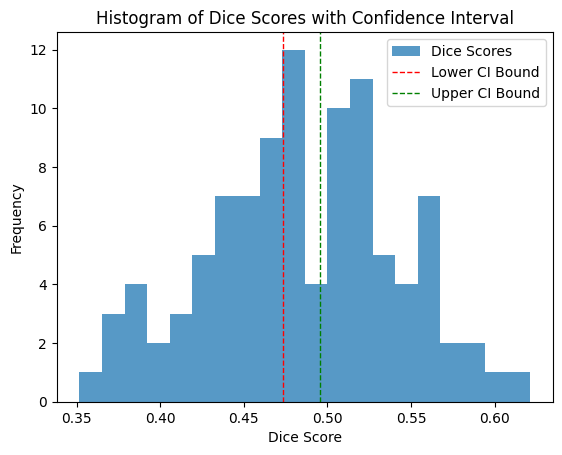

In [34]:
import matplotlib.pyplot as plt

# Assuming dice_scores is an array of Dice scores you've calculated
plt.hist(dice_scores, bins=20, alpha=0.75, label='Dice Scores')
plt.axvline(x=0.4732, color='r', linestyle='dashed', linewidth=1, label='Lower CI Bound')
plt.axvline(x=0.4956, color='g', linestyle='dashed', linewidth=1, label='Upper CI Bound')
plt.title('Histogram of Dice Scores with Confidence Interval')
plt.xlabel('Dice Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [43]:
import SimpleITK as sitk
import numpy as np

def load_mask(path):
    """ Load .mha file and convert to a binary array using SimpleITK """
    image = sitk.ReadImage(path)
    array = sitk.GetArrayFromImage(image)
    binary_mask = (array > 0).astype(int)  # Ensure mask is binary
    return binary_mask


In [44]:
# Paths to your files
path_to_ground_truth = '/content/drive/My Drive/nnunet_logs/ground_truths/ToothFairy2F_027.mha'
path_to_prediction = '/content/drive/My Drive/nnunet_logs/ToothFairy2F_027.mha'

# Load masks
y_true = load_mask(path_to_ground_truth)
y_pred = load_mask(path_to_prediction)


In [45]:
y_true_flat = y_true.flatten()
y_pred_flat = y_pred.flatten()

# Calculate Dice Coefficient or other metrics here


In [46]:
import SimpleITK as sitk
import numpy as np
import os

def load_mask(path):
    """Load .mha file and convert to a binary array."""
    image = sitk.ReadImage(path)
    array = sitk.GetArrayFromImage(image)
    binary_mask = (array > 0).astype(int)
    return binary_mask

def dice_coefficient(y_true, y_pred):
    """Calculate the Dice Coefficient."""
    intersection = np.sum(y_true * y_pred)
    if np.sum(y_true) + np.sum(y_pred) == 0:
        return 1  # Both segments are empty
    return 2. * intersection / (np.sum(y_true) + np.sum(y_pred))


In [47]:
# Directories containing your data
ground_truths_dir = '/content/drive/My Drive/nnunet_logs/ground_truths'
predictions_dir = '/content/drive/My Drive/nnunet_logs/predictions'

# Assuming file naming is consistent between ground truths and predictions
filenames = os.listdir(ground_truths_dir)  # List all files in the ground truth directory

dice_scores = []
for filename in filenames:
    gt_path = os.path.join(ground_truths_dir, filename)
    pred_path = os.path.join(predictions_dir, filename)

    if os.path.exists(pred_path):  # Ensure the prediction file exists
        y_true = load_mask(gt_path)
        y_pred = load_mask(pred_path)

        # Flatten arrays if needed and calculate the Dice coefficient
        dice_score = dice_coefficient(y_true.flatten(), y_pred.flatten())
        dice_scores.append(dice_score)
        print(f'Dice score for {filename}: {dice_score}')
    else:
        print(f'No prediction file for {filename}')

# Optionally, compute average Dice score across all files
if dice_scores:
    average_dice = sum(dice_scores) / len(dice_scores)
    print(f'Average Dice Score: {average_dice}')


Dice score for ToothFairy2P_065.mha: 0.7754894955821992
Dice score for ToothFairy2F_056.mha: 0.7552868174087125
Dice score for ToothFairy2F_027.mha: 0.7568567186726747
Dice score for ToothFairy2F_012.mha: 0.6314915546074683
Average Dice Score: 0.7297811465677637


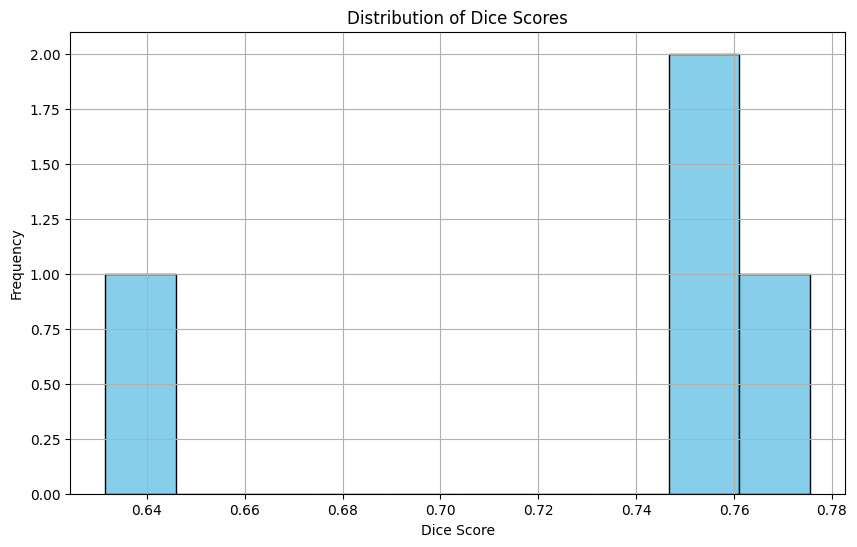

In [50]:
plt.figure(figsize=(10, 6))
plt.hist(dice_scores, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Dice Scores')
plt.xlabel('Dice Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


<ipython-input-51-2dafc4d85485>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dice_scores, orient='h', palette="cool")


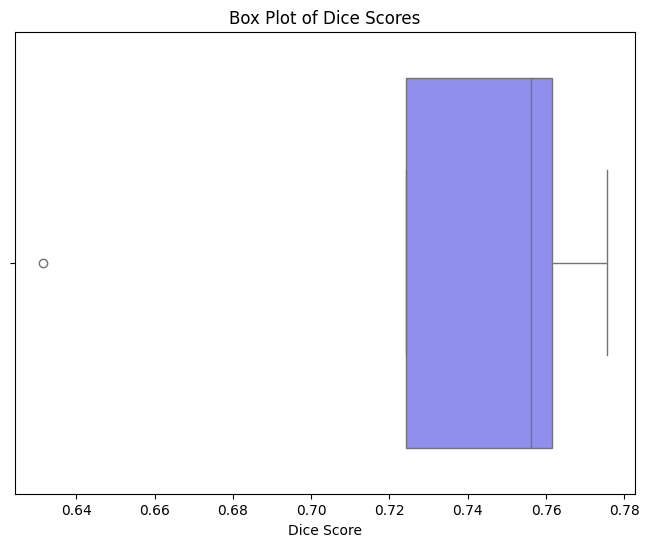

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=dice_scores, orient='h', palette="cool")
plt.title('Box Plot of Dice Scores')
plt.xlabel('Dice Score')
plt.show()


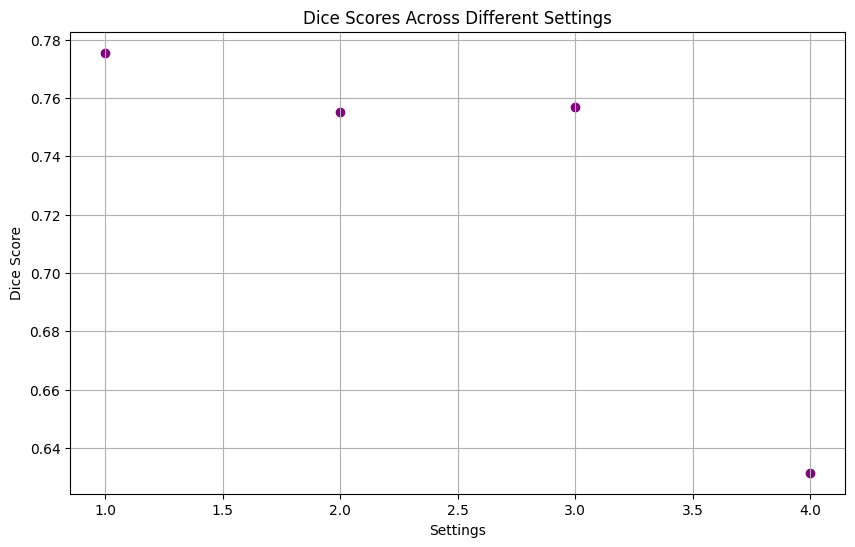

In [52]:
# Assuming you have a list or array `settings` that corresponds to different model settings or time points
settings = np.linspace(1, len(dice_scores), num=len(dice_scores))  # Example settings array

plt.figure(figsize=(10, 6))
plt.scatter(settings, dice_scores, color='purple')
plt.title('Dice Scores Across Different Settings')
plt.xlabel('Settings')
plt.ylabel('Dice Score')
plt.grid(True)
plt.show()


In [54]:
import SimpleITK as sitk
import json
import numpy as np
import os


In [55]:
# Path to the JSON file
json_path = '/content/drive/My Drive/nnUNet_data/nnUNet_raw/Dataset112_ToothFairy2/dataset.json'

# Load JSON data
with open(json_path, 'r') as file:
    labels = json.load(file)


In [62]:
import json

# Load JSON data
with open(json_path, 'r') as file:
    labels = json.load(file)

# Example of processing labels assuming keys are string representations of integers
for label, description in labels.items():
    try:
        label_index = int(label)  # Ensure label is an integer
        # Now use label_index in your processing logic
    except ValueError:
        print(f"Skipping invalid label key: {label}")
        continue


Skipping invalid label key: name
Skipping invalid label key: description
Skipping invalid label key: reference
Skipping invalid label key: license
Skipping invalid label key: release
Skipping invalid label key: latestUpdate
Skipping invalid label key: tensorImageSize
Skipping invalid label key: labels
Skipping invalid label key: numTraining
Skipping invalid label key: numTest
Skipping invalid label key: file_ending
Skipping invalid label key: channel_names


In [63]:
dice_scores = {}

for label, description in labels.items():
    try:
        label_index = int(label)
        gt_label_mask = (gt_mask == label_index)
        pred_label_mask = (pred_mask == label_index)
        dice_score = dice_coefficient(gt_label_mask, pred_label_mask)
        dice_scores[description] = dice_score
    except ValueError:
        print(f"Skipping label due to invalid literal for int(): {label}")
        continue

# Print out the dice scores
for desc, score in dice_scores.items():
    print(f"Dice score for {desc}: {score}")


Skipping label due to invalid literal for int(): name
Skipping label due to invalid literal for int(): description
Skipping label due to invalid literal for int(): reference
Skipping label due to invalid literal for int(): license
Skipping label due to invalid literal for int(): release
Skipping label due to invalid literal for int(): latestUpdate
Skipping label due to invalid literal for int(): tensorImageSize
Skipping label due to invalid literal for int(): labels
Skipping label due to invalid literal for int(): numTraining
Skipping label due to invalid literal for int(): numTest
Skipping label due to invalid literal for int(): file_ending
Skipping label due to invalid literal for int(): channel_names


In [64]:
# Print out the dice scores
for desc, score in dice_scores.items():
    print(f"Dice score for {desc}: {score}")

In [65]:
def load_segmentation(path):
    image = sitk.ReadImage(path)
    array = sitk.GetArrayFromImage(image)
    return array


In [66]:
def dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    if np.sum(y_true) + np.sum(y_pred) == 0:
        return 1  # Perfect match scenario
    return 2. * intersection / (np.sum(y_true) + np.sum(y_pred))


In [67]:
# Paths to your segmentation masks
gt_path = '/content/drive/My Drive/nnunet_logs/ground_truths/ToothFairy2F_027.mha'
pred_path = '/content/drive/My Drive/nnunet_logs/predictions/ToothFairy2F_027.mha'

# Load segmentation masks
gt_mask = load_segmentation(gt_path)
pred_mask = load_segmentation(pred_path)

In [68]:
dice_scores = {}

for filename in filenames:
    gt_path = os.path.join(ground_truths_dir, filename)
    pred_path = os.path.join(predictions_dir, filename)

    # Ensure the predicted file exists
    if os.path.exists(pred_path):
        gt_mask = load_segmentation(gt_path)
        pred_mask = load_segmentation(pred_path)

        # Calculate Dice score
        score = dice_coefficient(gt_mask.flatten(), pred_mask.flatten())
        dice_scores[filename] = score
    else:
        print(f"Warning: No corresponding prediction file found for {filename}")

# Display the Dice scores
for filename, score in dice_scores.items():
    print(f"{filename}: {score:.4f}")


ToothFairy2P_065.mha: 2.7162
ToothFairy2F_056.mha: 2.7973
ToothFairy2F_027.mha: 2.2763
ToothFairy2F_012.mha: 3.1425


In [69]:
def calculate_dice_scores(gt_mask, pred_mask):
    labels = np.unique(np.concatenate([np.unique(gt_mask), np.unique(pred_mask)]))  # All unique labels from both masks
    dice_scores = {}

    for label in labels:
        gt_label_mask = (gt_mask == label)
        pred_label_mask = (pred_mask == label)
        dice_score = dice_coefficient(gt_label_mask, pred_label_mask)
        dice_scores[label] = dice_score

    return dice_scores

# Calculate and print Dice scores for each label
dice_scores = calculate_dice_scores(gt_mask, pred_mask)
for label, score in dice_scores.items():
    print(f"Dice score for label {label}: {score}")


Dice score for label 0: 0.9789629836373837
Dice score for label 1: 0.6498089070989645
Dice score for label 2: 0.0
Dice score for label 3: 0.0
Dice score for label 4: 0.0
Dice score for label 5: 0.0
Dice score for label 6: 0.0
Dice score for label 7: 0.5619326972145406
Dice score for label 9: 0.0
Dice score for label 44: 0.0
Dice score for label 45: 0.0


In [70]:
# Paths to your segmentation masks
gt_path = '/content/drive/My Drive/nnunet_logs/ground_truths/ToothFairy2F_012.mha'
pred_path = '/content/drive/My Drive/nnunet_logs/predictions/ToothFairy2F_012.mha'

# Load segmentation masks
gt_mask = load_segmentation(gt_path)
pred_mask = load_segmentation(pred_path)

def calculate_dice_scores(gt_mask, pred_mask):
    labels = np.unique(np.concatenate([np.unique(gt_mask), np.unique(pred_mask)]))  # All unique labels from both masks
    dice_scores = {}

    for label in labels:
        gt_label_mask = (gt_mask == label)
        pred_label_mask = (pred_mask == label)
        dice_score = dice_coefficient(gt_label_mask, pred_label_mask)
        dice_scores[label] = dice_score

    return dice_scores

# Calculate and print Dice scores for each label
dice_scores = calculate_dice_scores(gt_mask, pred_mask)
for label, score in dice_scores.items():
    print(f"Dice score for label {label}: {score}")


Dice score for label 0: 0.9789629836373837
Dice score for label 1: 0.6498089070989645
Dice score for label 2: 0.0
Dice score for label 3: 0.0
Dice score for label 4: 0.0
Dice score for label 5: 0.0
Dice score for label 6: 0.0
Dice score for label 7: 0.5619326972145406
Dice score for label 9: 0.0
Dice score for label 44: 0.0
Dice score for label 45: 0.0


In [71]:
# Paths to your segmentation masks
gt_path = '/content/drive/My Drive/nnunet_logs/ground_truths/ToothFairy2F_056.mha'
pred_path = '/content/drive/My Drive/nnunet_logs/predictions/ToothFairy2F_056.mha'

# Load segmentation masks
gt_mask = load_segmentation(gt_path)
pred_mask = load_segmentation(pred_path)

def calculate_dice_scores(gt_mask, pred_mask):
    labels = np.unique(np.concatenate([np.unique(gt_mask), np.unique(pred_mask)]))  # All unique labels from both masks
    dice_scores = {}

    for label in labels:
        gt_label_mask = (gt_mask == label)
        pred_label_mask = (pred_mask == label)
        dice_score = dice_coefficient(gt_label_mask, pred_label_mask)
        dice_scores[label] = dice_score

    return dice_scores

# Calculate and print Dice scores for each label
dice_scores = calculate_dice_scores(gt_mask, pred_mask)
for label, score in dice_scores.items():
    print(f"Dice score for label {label}: {score}")


Dice score for label 0: 0.9803679622480242
Dice score for label 1: 0.7472225236673307
Dice score for label 2: 0.0
Dice score for label 3: 0.0
Dice score for label 4: 0.0
Dice score for label 7: 0.5859955025182421
Dice score for label 9: 0.0
Dice score for label 10: 0.0
Dice score for label 21: 0.0
Dice score for label 22: 0.0
Dice score for label 23: 0.0


In [72]:
# Paths to your segmentation masks
gt_path = '/content/drive/My Drive/nnunet_logs/ground_truths/ToothFairy2P_065.mha'
pred_path = '/content/drive/My Drive/nnunet_logs/predictions/ToothFairy2P_065.mha'

# Load segmentation masks
gt_mask = load_segmentation(gt_path)
pred_mask = load_segmentation(pred_path)

def calculate_dice_scores(gt_mask, pred_mask):
    labels = np.unique(np.concatenate([np.unique(gt_mask), np.unique(pred_mask)]))  # All unique labels from both masks
    dice_scores = {}

    for label in labels:
        gt_label_mask = (gt_mask == label)
        pred_label_mask = (pred_mask == label)
        dice_score = dice_coefficient(gt_label_mask, pred_label_mask)
        dice_scores[label] = dice_score

    return dice_scores

# Calculate and print Dice scores for each label
dice_scores = calculate_dice_scores(gt_mask, pred_mask)
for label, score in dice_scores.items():
    print(f"Dice score for label {label}: {score}")


Dice score for label 0: 0.9772333711279632
Dice score for label 1: 0.7088705369921711
Dice score for label 3: 0.0
Dice score for label 4: 0.0
Dice score for label 7: 0.7342370658771681
Dice score for label 9: 0.17684704093270814
Dice score for label 11: 0.0
Dice score for label 12: 0.0
Dice score for label 13: 0.0
Dice score for label 14: 0.0
Dice score for label 15: 0.0
Dice score for label 16: 0.0
Dice score for label 17: 0.0
Dice score for label 21: 0.0
Dice score for label 22: 0.0
Dice score for label 23: 0.0
Dice score for label 24: 0.0
Dice score for label 25: 0.0
Dice score for label 26: 0.0
Dice score for label 27: 0.0
Dice score for label 31: 0.0
Dice score for label 32: 0.0
Dice score for label 33: 0.0
Dice score for label 35: 0.0
Dice score for label 41: 0.0
Dice score for label 42: 0.0
Dice score for label 43: 0.0
Dice score for label 44: 0.0
